Loaded existing data
data/final.csv created successfully!
data/output.csv created!

Average sales per product per quarter:


,Product_A,Product_B,Product_C,Product_D
Quarter,,,,
Q1,72.67,55.33,38.33,31.33
Q2,63.67,52.00,41.00,33.00
Q3,86.00,70.00,33.67,35.33
Q4,83.67,54.00,30.33,29.00



Total sales per quarter:


,Total_Sales
Quarter,
Q1,593
Q2,569
Q3,675
Q4,591


KEY INSIGHTS – 2025
----------------------------------------
Best-selling product of the year   : Product A (918 units)
Best performing month              : Sep
Best performing quarter            : Q3


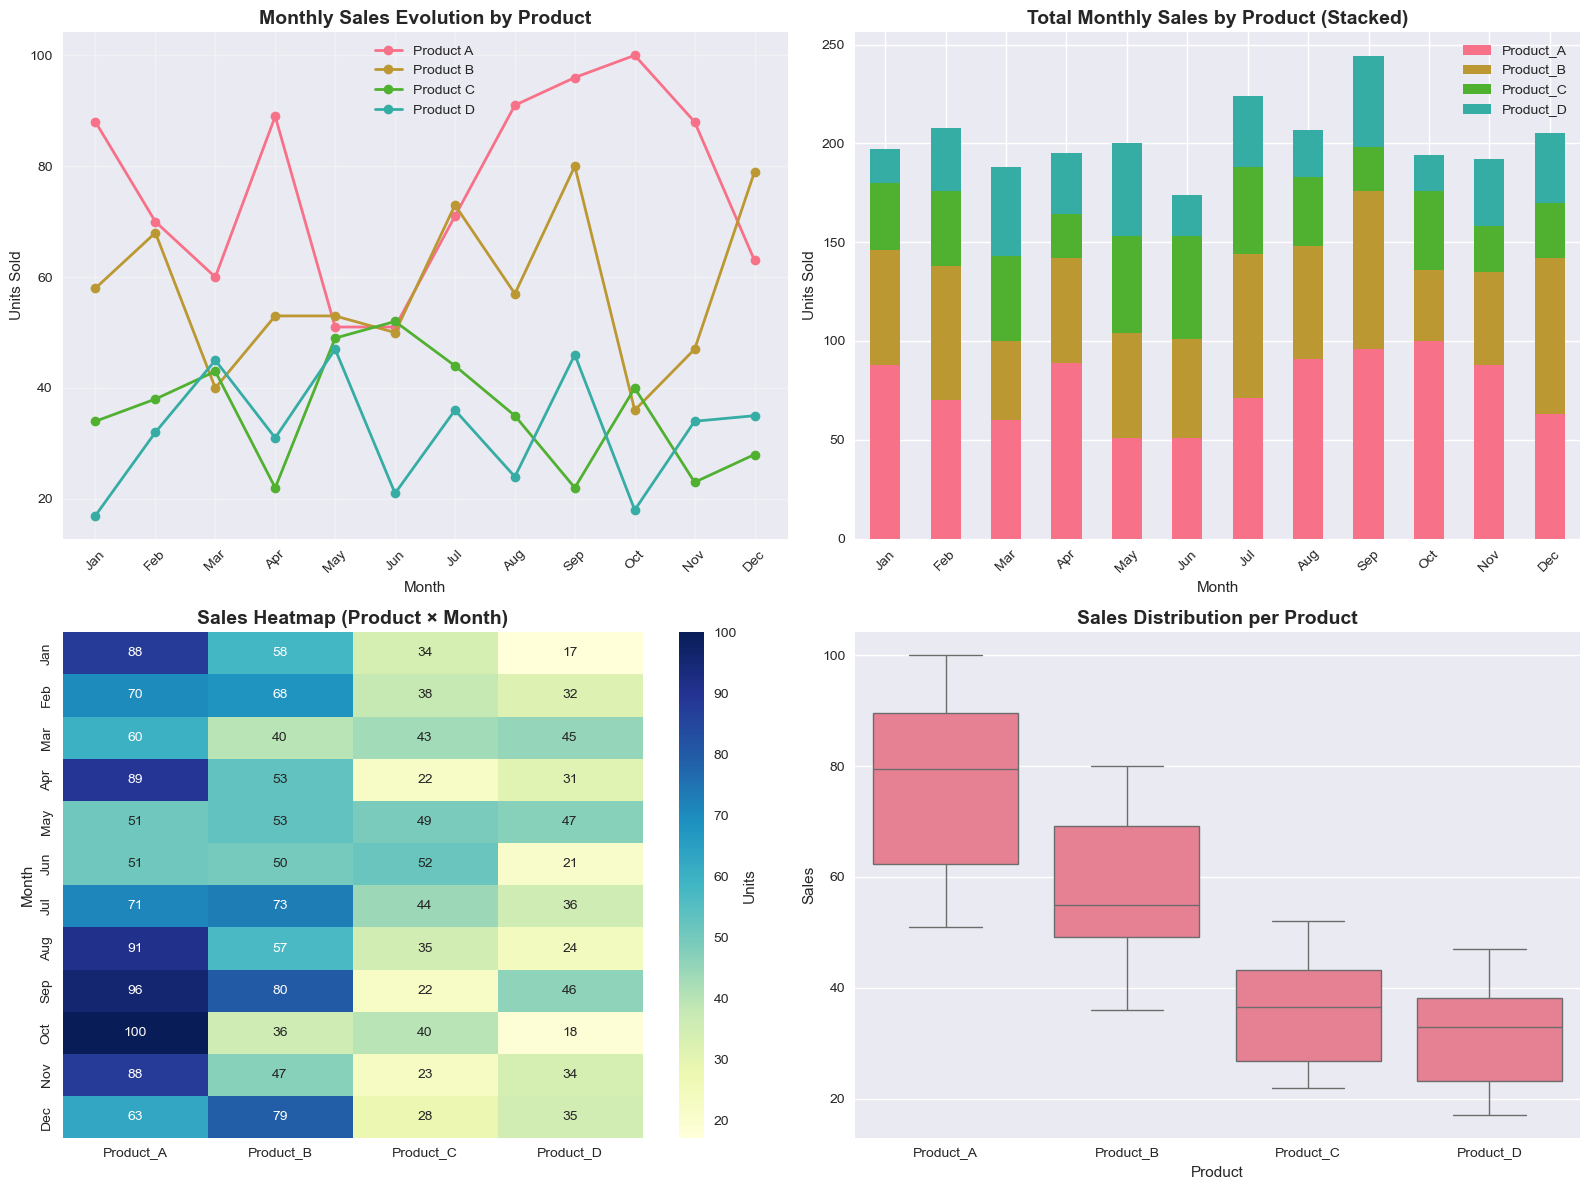

1. Which product contributes the most to overall sales throughout the year?
   → Product A is the clear leader,
     contributing 918 units – more than any other product in 2025.


2. Which quarter performs best and why might that be?
   → Q3 is the strongest quarter,
     with a total of 675 units sold.
     Possible reasons include:
     • End-of-year holiday demand
     • Seasonal promotions or marketing campaigns
     • Higher consumer spending in Q4

3. How could this information be used to improve the sales strategy for 2026?
   Recommended actions:
   • Allocate more inventory and marketing budget to Product A
   • Plan major promotions and stock buildup ahead of Q3
   • Create product bundles including the lowest-performing product
   • Set monthly targets based on historical MoM growth patterns
   • Repeat successful campaigns from the best month and quarter


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("data", exist_ok=True)


plt.style.use("seaborn-v0_8")
sns.set_palette("husl")


def generate_monthly_sales(seed=42):
    np.random.seed(seed)
    dates = pd.date_range("2025-01-01", "2025-12-01", freq="MS")
    
    data = []
    for date in dates:
        row = {
            "Date": date,
            "Product_A": np.random.randint(50, 101),   # 50–100
            "Product_B": np.random.randint(30, 81),    # 30–80
            "Product_C": np.random.randint(20, 61),    # 20–60
            "Product_D": np.random.randint(10, 51),    # 10–50
        }
        data.append(row)
    
    df = pd.DataFrame(data)
    df.to_csv("data/initial.csv", index=False)
    print("data/initial.csv generated successfully!")
    return df


try:
    df = pd.read_csv("data/initial.csv", parse_dates=["Date"])
    print("Loaded existing data")
except:
    df = generate_monthly_sales()

df.head(12)


df_final = df.copy()
products = ["Product_A", "Product_B", "Product_C", "Product_D"]


df_final["Total_Sales"]     = df_final[products].sum(axis=1)
df_final["Average_Sales"]   = df_final[products].mean(axis=1)
df_final["MoM_Growth_%"]    = df_final["Total_Sales"].pct_change() * 100


df_final["Month"]    = df_final["Date"].dt.strftime("%b")        # Jan, Feb...
df_final["Quarter"]  = df_final["Date"].dt.quarter.map({1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"})


df_final["Max_Sales_Product"] = df_final[products].idxmax(axis=1).str.replace("_", " ")
df_final["Min_Sales_Product"] = df_final[products].idxmin(axis=1).str.replace("_", " ")


df_final.to_csv("data/final.csv", index=False)
print("data/final.csv created successfully!")

df_final[['Date', 'Month', 'Quarter', 'Product_A', 'Product_B', 'Product_C', 'Product_D',
          'Total_Sales', 'Average_Sales', 'MoM_Growth_%', 'Max_Sales_Product', 'Min_Sales_Product']]



pivot_avg = pd.pivot_table(df_final,
                           values=products,
                           index="Quarter",
                           aggfunc="mean").round(2)


pivot_total = pd.pivot_table(df_final,
                             values="Total_Sales",
                             index="Quarter",
                             aggfunc="sum")

output_df = pd.concat([pivot_avg, pivot_total], axis=1)
output_df.columns = list(pivot_avg.columns) + ["Total_Sales_Quarter"]
output_df.to_csv("data/output.csv")

print("data/output.csv created!")
print("\nAverage sales per product per quarter:")
display(pivot_avg)
print("\nTotal sales per quarter:")
display(pivot_total)


total_year = df_final[products].sum()
best_product = total_year.idxmax().replace("_", " ")
best_product_units = int(total_year.max())

best_month = df_final.loc[df_final["Total_Sales"].idxmax(), "Month"]
best_quarter = df_final.groupby("Quarter")["Total_Sales"].sum().idxmax()

print("KEY INSIGHTS – 2025")
print("-" * 40)
print(f"Best-selling product of the year   : {best_product} ({best_product_units:,} units)")
print(f"Best performing month              : {best_month}")
print(f"Best performing quarter            : {best_quarter}")


plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
for col in products:
    plt.plot(df_final["Month"], df_final[col], marker="o", linewidth=2, label=col.replace("_", " "))
plt.title("Monthly Sales Evolution by Product", fontsize=14, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)


max_total = df_final["Total_Sales"].max()
best_month_x = df_final[df_final["Total_Sales"] == max_total]["Month"].iloc[0]
plt.annotate(f"Peak Month\n{best_month}", xy=(best_month_x, max_total),
             xytext=(best_month_x, max_total + 20),
             arrowprops=dict(arrowstyle="->", color="red", lw=2),
             fontsize=11, color="red", ha="center")

plt.subplot(2, 2, 2)
df_final.set_index("Month")[products].plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Total Monthly Sales by Product (Stacked)", fontsize=14, fontweight="bold")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
sns.heatmap(df_final.set_index("Month")[products], annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Units'})
plt.title("Sales Heatmap (Product × Month)", fontsize=14, fontweight="bold")


plt.subplot(2, 2, 4)
df_melt = df_final.melt(value_vars=products, var_name="Product", value_name="Sales")
sns.boxplot(x="Product", y="Sales", data=df_melt)
plt.title("Sales Distribution per Product", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()






print("1. Which product contributes the most to overall sales throughout the year?")
print(f"   → {best_product} is the clear leader,")
print(f"     contributing {best_product_units:,} units – more than any other product in 2025.\n")

print("\n2. Which quarter performs best and why might that be?")
print(f"   → {best_quarter} is the strongest quarter,")
quarter_max = int(df_final.groupby("Quarter")["Total_Sales"].sum().max())
print(f"     with a total of {quarter_max:,} units sold.")
print("     Possible reasons include:")
print("     • End-of-year holiday demand")
print("     • Seasonal promotions or marketing campaigns")
print("     • Higher consumer spending in Q4\n")

print("3. How could this information be used to improve the sales strategy for 2026?")
print("   Recommended actions:")
print(f"   • Allocate more inventory and marketing budget to {best_product}")
print(f"   • Plan major promotions and stock buildup ahead of {best_quarter}")
print("   • Create product bundles including the lowest-performing product")
print("   • Set monthly targets based on historical MoM growth patterns")
print("   • Repeat successful campaigns from the best month and quarter")

